<a href="https://colab.research.google.com/github/KasiaLewandowska/Analiza-portfelowa-spolek-energetycznych/blob/main/Projekt_Katarzyna_Lewandowska%2C_Krzysztof_Niedziejko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analiza portfelowa spółek energetycznych**
Katarzyna Lewandowska, Krzysztof Niedziejko

## Wprowadzenie

W naszej dokumentacji przedstawimy projekt dotyczący analizy portfelowej z wykorzystaniem uczenia maszynowego dla pięciu spółek branży energetycznej:
- Kombinat Górniczo-Hutniczy Miedzi (**KGHM**)

  <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Kghm_nowe_logo.svg" width="200">

<br>

- LW Bogdanka (**LWB**)

  <img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/LWBogdanka_logo.png" width="200">

<br>

- Jastrzębska Spółka Węglowa (**JSW**)

  <img src="https://uksw.edu.pl/images/aktualnosci/spolka-weglowa.jpg" width="200">

<br>

- Gazprom (**GAZP**)

  <img src="https://upload.wikimedia.org/wikipedia/commons/4/42/Gazprom_logo.svg" width="200">

<br>

- ExxonMobil Corporation (**XOM**)

  <img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Exxon_Mobil_Logo.svg" width="200">

<br>

Trzy pierwsze są spółkami polskimi, a dwie ostatnie zagranicznymi. Celem projektu jest zastosowanie technik analizy danych do oceny atrakcyjności portfela inwestycyjnego, a także ocena sytuacji wybranych spółek i ich porównanie.

Branża energetyczna jest jedną z najważniejszych w gospodarce oraz stanowi filar bezpieczeństwa kraju. Wybrane przez nas spółki mają duże znaczenie na rynku energetycznym w Polsce i na świecie.

**JSW** to czołowy producent węgla kokosowego w Europie i istotna firma górnicza w Polsce. **KGHM** – jedna z największych spółek górniczo-hutniczych na świecie, zajmująca się wydobyciem i przetwórstwem miedzi oraz innych metali. **LW Bogdanka** to firma, wydobywająca węgiel kamienny. W ostatnim czasie odnotowała wysoką stopę zwrotu dla inwestorów. Działalność **Gazpromu** związana jest z wydobyciem i produkcją gazu ziemnego oraz jego przesyłem. Gazprom to kluczowy gracz na rynku produkcji gazu, o czym mieszkańcy Europy mogli szczególnie przekonać się od czasu wybuchu wojny rosyjsko-ukraińskiej. **Exxon Mobil** jest z kolei amerykańską firmą zajmującą się przetwórstwem ropy naftowej i gazu ziemnego.

## Wizualizacja notowań spółek

Na potrzeby projektu zebrano dane dotyczące dziennej wartości notowań powyższych spółek w ciągu 5 lat od 13 marca 2018 do 13 marca 2023. Dane dla polskich firm pobrano ze strony stooq.pl, a w celu pozyskania danych firm zagranicznych skorzystaliśmy z zasobów dostępnych na stronie investing.com.

Przygotowanie bibliotek

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import math
import numpy as np

from scipy import stats

from scipy.stats import mode, norm, jarque_bera, chisquare, shapiro, kurtosistest, ttest_1samp
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
!pip install seaborn-qqplot
from seaborn_qqplot import pplot
from statsmodels.tsa.stattools import adfuller

!pip install ydata_profiling
from ydata_profiling import ProfileReport

!python3 -m pip install TA-Lib
import statsmodels.api as sm

Zdefiniowanie funkcji wyświetlających notowania spółek w postaci dataframe'u i na wykresach

In [ ]:
def notowania_dataframe(spolka, y):
  spolka_dane = pd.read_csv(f'{spolka}.csv')
  spolka_dane = spolka_dane[['Data', y]]
  spolka_dane = spolka_dane.rename(columns={y: spolka})
  return spolka_dane

In [ ]:
def notowania_wykresy(spolka, color):
    fig, ax = plt.subplots(figsize=(18, 5))
    spolka.plot(x='Data', y=spolka.columns[1], kind='line', ax=ax, color=color)
    ax.set_xlabel('Data')
    ax.set_ylabel('Cena zamknięcia')
    plt.show()

### KGHM

In [ ]:
spolka1 = notowania_dataframe('kgh', 'Zamkniecie')
spolka1['Data'] = pd.to_datetime(spolka1['Data'], format='%Y-%m-%d')
spolka1

,Data,kgh
0,2018-03-13,98.8252
1,2018-03-14,99.6408
2,2018-03-15,98.9223
3,2018-03-16,97.3786
4,2018-03-19,91.6136
...,...,...
1245,2023-03-07,125.8500
1246,2023-03-08,126.0000
1247,2023-03-09,121.9000
1248,2023-03-10,121.4500


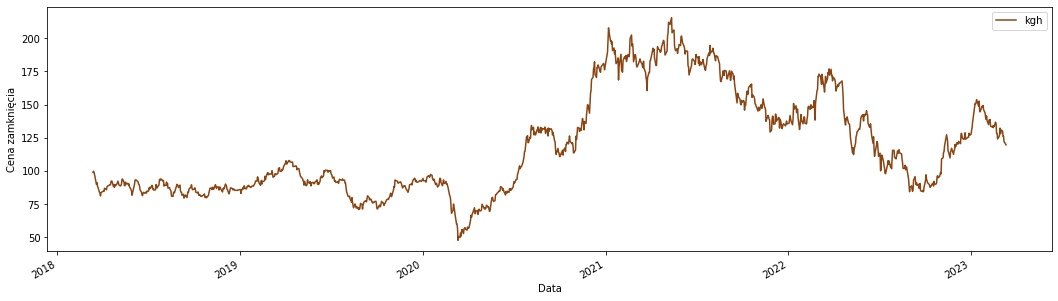

In [ ]:
notowania_wykresy(spolka1, 'saddlebrown')

### LWB

In [ ]:
spolka2 = notowania_dataframe('lwb', 'Zamkniecie')
spolka2['Data'] = pd.to_datetime(spolka2['Data'], format='%Y-%m-%d')
spolka2

,Data,lwb
0,2018-03-13,51.0072
1,2018-03-14,50.7261
2,2018-03-15,50.0712
3,2018-03-16,50.0712
4,2018-03-19,49.0414
...,...,...
1245,2023-03-07,45.5000
1246,2023-03-08,45.0800
1247,2023-03-09,45.4600
1248,2023-03-10,44.5600


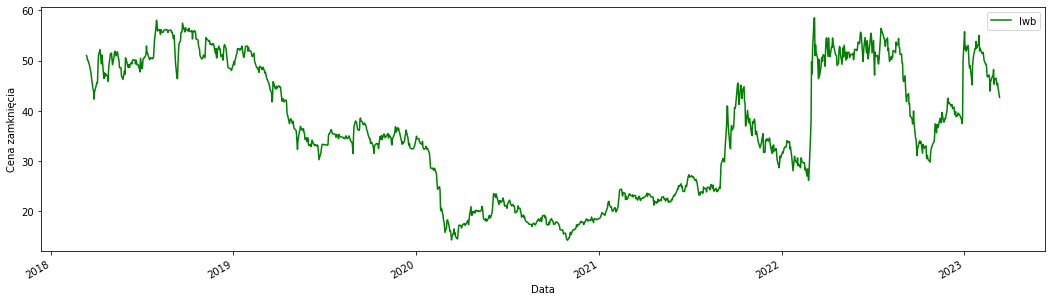

In [ ]:
notowania_wykresy(spolka2, 'green')

### JSW

In [ ]:
spolka3 = notowania_dataframe('jsw', 'Zamkniecie')
spolka3['Data'] = pd.to_datetime(spolka3['Data'], format='%Y-%m-%d')
spolka3

,Data,jsw
0,2018-03-13,92.941
1,2018-03-14,90.650
2,2018-03-15,89.742
3,2018-03-16,88.738
4,2018-03-19,87.091
...,...,...
1245,2023-03-07,52.600
1246,2023-03-08,53.040
1247,2023-03-09,52.160
1248,2023-03-10,50.660


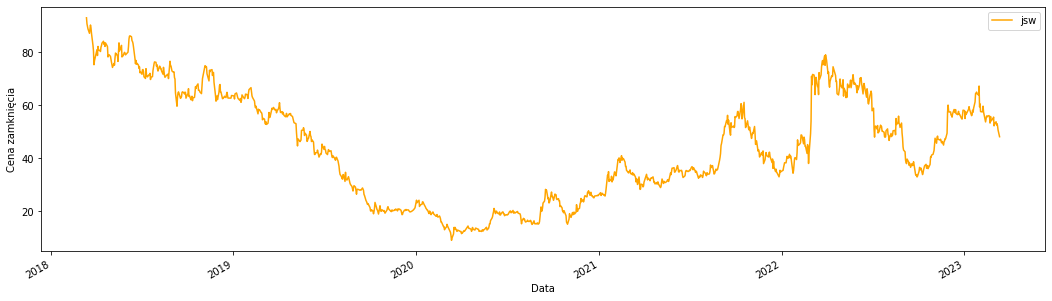

In [ ]:
notowania_wykresy(spolka3, 'orange')

### GAZP

In [ ]:
spolka4 = notowania_dataframe('gazp', 'Ostatnio')
spolka4['Data'] = pd.to_datetime(spolka4['Data'], format='%d.%m.%Y')
spolka4 = spolka4.sort_values('Data', ascending=True)
spolka4['gazp'] = spolka4['gazp'].str.replace(',', '.').astype(float)
spolka4

,Data,gazp
1246,2018-03-13,142.75
1245,2018-03-14,138.80
1244,2018-03-15,138.25
1243,2018-03-16,141.00
1242,2018-03-19,139.91
...,...,...
4,2023-03-06,163.35
3,2023-03-07,162.57
2,2023-03-09,161.21
1,2023-03-10,160.04


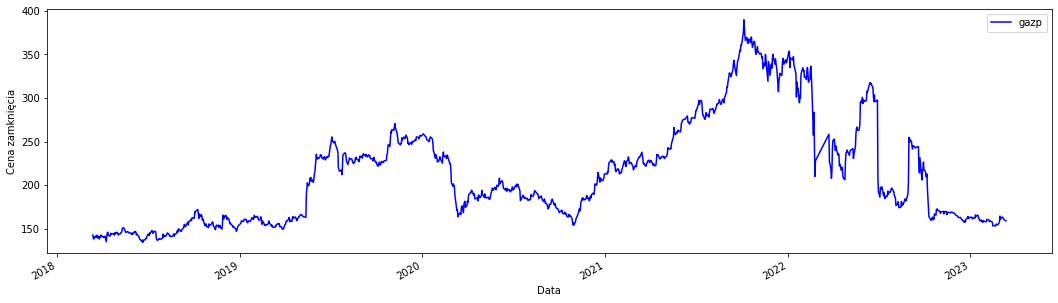

In [ ]:
notowania_wykresy(spolka4, 'blue')

### XOM

In [ ]:
spolka5 = notowania_dataframe('xom', 'Ostatnio')
spolka5['Data'] = pd.to_datetime(spolka5['Data'], format='%d.%m.%Y')
spolka5 = spolka5.sort_values('Data', ascending=True)
spolka5['xom'] = spolka5['xom'].str.replace(',', '.').astype(float)
spolka5

,Data,xom
1258,2018-03-13,74.53
1257,2018-03-14,73.60
1256,2018-03-15,74.42
1255,2018-03-16,75.12
1254,2018-03-19,74.15
...,...,...
4,2023-03-07,111.61
3,2023-03-08,109.98
2,2023-03-09,109.13
1,2023-03-10,107.78


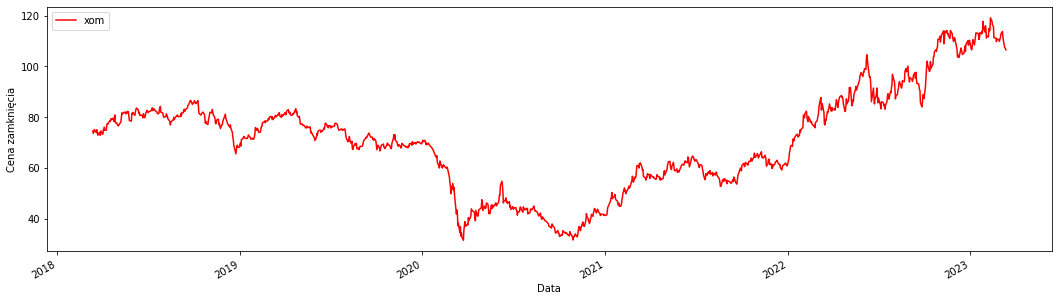

In [ ]:
notowania_wykresy(spolka5, 'red')

### Notowania wszystkich spółek

In [ ]:
spolki = spolka1.merge(spolka2, on='Data').merge(spolka3, on='Data').merge(spolka4, on='Data').merge(spolka5, on='Data')
spolki['Data'] = pd.to_datetime(spolki['Data'], format='%Y-%m-%d')
spolki = spolki.sort_values('Data', ascending=True)
spolki

,Data,kgh,lwb,jsw,gazp,xom
0,2018-03-13,98.8252,51.0072,92.941,142.75,74.53
1,2018-03-14,99.6408,50.7261,90.650,138.80,73.60
2,2018-03-15,98.9223,50.0712,89.742,138.25,74.42
3,2018-03-16,97.3786,50.0712,88.738,141.00,75.12
4,2018-03-19,91.6136,49.0414,87.091,139.91,74.15
...,...,...,...,...,...,...
1163,2023-03-06,130.0000,46.5000,53.780,163.35,113.81
1164,2023-03-07,125.8500,45.5000,52.600,162.57,111.61
1165,2023-03-09,121.9000,45.4600,52.160,161.21,109.13
1166,2023-03-10,121.4500,44.5600,50.660,160.04,107.78


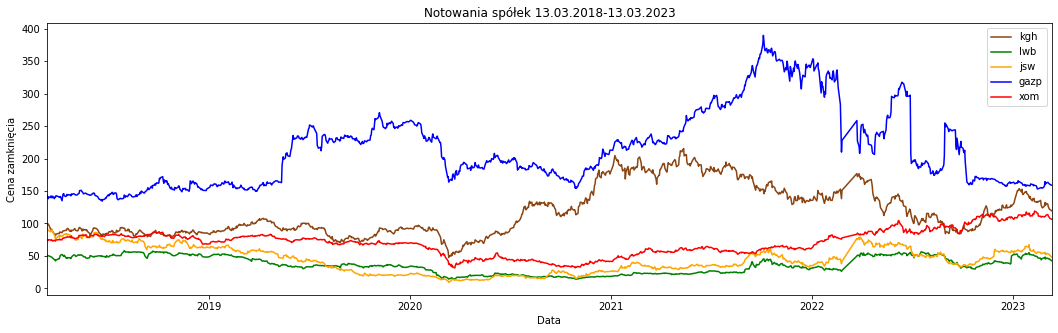

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))

ax.plot(spolki['Data'], spolki['kgh'], color="saddlebrown", label="kgh".strip())
ax.plot(spolki['Data'], spolki['lwb'], color="green", label="lwb".strip())
ax.plot(spolki['Data'], spolki['jsw'], color="orange", label="jsw".strip())
ax.plot(spolki['Data'], spolki['gazp'], color="blue", label="gazp".strip())
ax.plot(spolki['Data'], spolki['xom'], color="red", label="xom".strip())

ax.set_xlim(spolki['Data'].min(), spolki['Data'].max())

ax.set_title('Notowania spółek 13.03.2018-13.03.2023')
ax.set_xlabel('Data')
ax.set_ylabel('Cena zamknięcia')

ax.legend()

plt.show()


## Przygotowanie i analiza statystyczna danych

### Oczyszczenie danych

Wyświetlając ramki danych naszych spółek, można zauważyć, że liczba wierszy w polskich spółkach jest taka sama, natomiast dane dla spółek zagranicznych zawierają inną liczbę wierszy. Istnieje zatem ryzyko występowania duplikatów lub brakujących wartości. W celu sprawdzenia, czy dane są prawidłowe wyświetlone zostaną również wartości zduplikowane.

In [ ]:
spolki = [spolka1, spolka2, spolka3, spolka4, spolka5]
def oczyszczanie(spolki):
  for spolka in spolki:
    print(f"{spolka.columns[1]}\n")
    duplik = spolka.duplicated(subset=['Data'], keep=False)
    duplikaty = spolka[duplik]
    print(f"\nZduplikowane wartości: \n{duplikaty}\n")


In [ ]:
oczyszczanie(spolki)

kgh


Zduplikowane wartości: 
Empty DataFrame
Columns: [Data, kgh]
Index: []

lwb


Zduplikowane wartości: 
Empty DataFrame
Columns: [Data, lwb]
Index: []

jsw


Zduplikowane wartości: 
Empty DataFrame
Columns: [Data, jsw]
Index: []

gazp


Zduplikowane wartości: 
Empty DataFrame
Columns: [Data, gazp]
Index: []

xom


Zduplikowane wartości: 
Empty DataFrame
Columns: [Data, xom]
Index: []



Dane, pomimo zróżnicowanej liczby wierszy w kolumnach, nie zawierają błędów w postaci zduplikowanych wartości. Poniżej wyświetlone zostaną daty, dla których przynajmniej jedna ze spółek nie posiada notowań.

In [ ]:
spolki = pd.merge(spolka1, spolka2, on="Data", how="outer")
spolki = pd.merge(spolki, spolka3, on="Data", how="outer")
spolki = pd.merge(spolki, spolka4, on="Data", how="outer")
spolki = pd.merge(spolki, spolka5, on="Data", how="outer")

brakujaca_data = spolki[spolki.iloc[:, 1:].isnull().any(axis=1)]
brakujaca_data

,Data,kgh,lwb,jsw,gazp,xom
37,2018-05-09,90.0155,51.8496,77.738,NaN,79.93
50,2018-05-28,86.0689,47.9189,79.934,145.09,NaN
60,2018-06-12,90.0350,49.3225,84.327,NaN,82.42
76,2018-07-04,86.2029,50.1649,73.459,142.24,NaN
118,2018-09-03,89.2456,54.3767,72.418,148.73,NaN
...,...,...,...,...,...,...
1301,2020-05-01,NaN,NaN,NaN,NaN,43.14
1302,2020-12-31,NaN,NaN,NaN,NaN,41.22
1303,2021-05-03,NaN,NaN,NaN,NaN,58.82
1304,2021-12-31,NaN,NaN,NaN,NaN,61.19


Dane giełdowe dla różnych rynków i krajów nie są do końca spójne. W wyniku różnic kulturowych święta narodowe oraz lokalne przypadają w różne dni, a notowania w tych dniach nie są publikowane.

Istnieje kilka technik uzupełniania brakujących danych. Można zdecydować się na pominięcie dat, dla których dane występują jedynie w niektórych spółkach. W takim przypadku istnieje jednak ryzyko, że wyniki mogą być mniej dokładne, ponieważ będą uwzględniały tylko niektóre dane (około 90%).

Z tego względu zdecydowaliśmy się na uzupełnienie pustych miejsc za pomocą interpolacji liniowej.


#### Eliminacja wartości odstających 

Aby pozyskać wiarygodne rezultaty użycia metod uczenia maszynowego (tj. niezaburzone, niezniekształcone wyniki), podobnie jak w przypadku standardowych badań statystycznych niezbędne jest nie tylko uzupełnienie braków, ale również zbadanie zbioru pod kątem obecności wartości nietypowych, tzw *outlierów*. Pod pojęciem tym należy rozumieć wartości zdolne do zaburzenia założeń stawianych przed potencjalnymi modelami. Usunięcie ów wartości jest jednak uzasadnione w określonych przypadkach. Metody wykrywania obserwacji odstających (reguła trzech sigm, reguła 1.5-krotności wartoci rozstępu międzykwartylowego etc) zależne są od przyjmowanego rozkładu. W przypadku rozkładu normalnego, zgodnie z regułą trzech sigm uznaje się, że wartości odstające to te przekraczające wartość trzykrotnej wartości odchyleń standardowych od wartości oczekiwanej.

Naszym zdaniem jednak z pewną dozą prawdopodobieństwa mamy tu do czynienia z naturalną skłonnością do generowania wartości odstających i stanowi naturalny element dytrybucji informacji - idealne dopasowanie nie musi nieść za sobą poprawy prognozowania.

### Interpolacja

Dokonana zostanie interpolacja liniowa, która na podstawie znanych wartości znajduje funkcję liniową łączącą dwie najbliższe wartości. Na tej podstawie oblicza brakujące wartości.

W przypadku brakujących wartości, do których nie można dokonać interpolacji (np. jeśli brakuje wartości na początku lub na końcu ramki danych), algorytm będzie próbował uzupełnić te braki z obu stron - zarówno przed pierwszą wartością, jak i za ostatnią.

In [ ]:
spolki['Data'] = pd.to_datetime(spolki['Data'], format='%Y-%m-%d')
spolki = spolki.sort_values('Data', ascending=True)
spolki.set_index('Data', inplace=True)
spolki

,kgh,lwb,jsw,gazp,xom
Data,,,,,
2018-03-13,98.8252,51.0072,92.941,142.75,74.53
2018-03-14,99.6408,50.7261,90.650,138.80,73.60
2018-03-15,98.9223,50.0712,89.742,138.25,74.42
2018-03-16,97.3786,50.0712,88.738,141.00,75.12
2018-03-19,91.6136,49.0414,87.091,139.91,74.15
...,...,...,...,...,...
2023-03-07,125.8500,45.5000,52.600,162.57,111.61
2023-03-08,126.0000,45.0800,53.040,NaN,109.98
2023-03-09,121.9000,45.4600,52.160,161.21,109.13


In [ ]:
spolki_interpolacja = spolki.interpolate(method='linear', limit_direction='both')

In [ ]:
spolki_interpolacja

,kgh,lwb,jsw,gazp,xom
Data,,,,,
2018-03-13,98.8252,51.0072,92.941,142.75,74.53
2018-03-14,99.6408,50.7261,90.650,138.80,73.60
2018-03-15,98.9223,50.0712,89.742,138.25,74.42
2018-03-16,97.3786,50.0712,88.738,141.00,75.12
2018-03-19,91.6136,49.0414,87.091,139.91,74.15
...,...,...,...,...,...
2023-03-07,125.8500,45.5000,52.600,162.57,111.61
2023-03-08,126.0000,45.0800,53.040,161.89,109.98
2023-03-09,121.9000,45.4600,52.160,161.21,109.13


### Analiza statystyczna

W poniższym etapie analizowane szeregi czasowe zostaną poddane elementarnej analizie statystycznej. Za sprawą kilku testów zweryfikowana zostanie między innymi hipoteza dotycząca rozkładu normalnego jako rozkładu najlepiej definiującego szeregi cen zamknięcia spółek.

Na początku warto przyjrzeć się wartościom miar opisujących strukturę zbiorowości - oprócz miar położenia, czyli m.in. miar tendencji centralnej (m.in. średnia/mediana) i kwantyli kluczowe znaczenie mogą mieć dla nas wartości kurtozy i skośności.

In [ ]:
statystyki = spolki_interpolacja.describe()

statystyki.loc['var']=spolki_interpolacja.var().to_list()
statystyki.loc['std']=spolki_interpolacja.std().to_list()
statystyki.loc['kurt']=spolki_interpolacja.kurtosis().to_list()
statystyki.loc['skośność']=spolki_interpolacja.skew().to_list()
#statystyki.loc['moda']=np.bincount(spolki_interpolacja).argmax().to_list()

statystyki

,kgh,lwb,jsw,gazp,xom
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,118.094075,36.174914,44.260208,213.052691,70.755456
std,38.255241,12.864034,20.184757,59.148614,19.875349
min,47.559200,14.170000,9.130000,134.400000,31.450000
25%,87.940750,23.425413,26.332500,162.396250,57.087500
50%,103.005000,34.994700,41.836500,198.835000,71.910000
75%,144.911750,49.429375,61.854000,244.850000,81.880000
max,215.456000,58.515800,92.941000,389.820000,119.170000
var,1463.463482,165.483368,407.424421,3498.558490,395.029482
kurt,-0.769329,-1.364759,-1.077252,-0.114454,-0.390281


In [ ]:
print(mode(spolki_interpolacja))

ModeResult(mode=array([[ 90.0155,  34.4211,  20.56  , 141.5   ,  60.93  ]]), count=array([[ 6, 12,  5,  4,  3]]))


<ipython-input-48-497350319048>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(mode(spolki_interpolacja))


Z powyższej tabeli wyciągamy standardowy wniosek - żaden szereg nie ma rozkładu symetrycznego, ujemne wartości współczynnika kurtozy to zaś odrzucenie hipotezy o rozkładzie normalnym (wyraźne spłaszczenie, platokurtoza). Na temat asymetrii każdego szereg więcej może nam powiedzieć bieżący stosunek średniej, mediany i dominanty:

*   Dla spółek polskich i rosyjskiej mamy do czynienia z rozkładem prawoskośnym (średnia > mediana > moda),
*   ExxonMobil cechuje się z dużym prawdopodobieństwem rozkładem lewoskośnym (mediana > średnia > dominanta, typowy rozkład ma jednak stosunek dominanta > mediana > średnia).

Wnioski te nie do końca potwierdza wartość współczynnika skośności - dodatnia wartość sugeruje prawostronny charakter rozkładu i z takim mamy do czynienia z dużym prawdopodobieństwem w przypadku spółek **KGHM** i **Gazprom** (skośność silna/b.silna). Pozostałe, szczególnie **Bogdanka** zbliżone są do rozkładu symetrycznego (zbliżona wartość miar tendencji centralnej). Ciekawy przypadek to rozkład cen zamknięcia ExxonMobil - wartość wsp. skośności jest dodatnia (skośność bardzo słaba), stosunek miar tendencji centralnej jest wobec tego niejednoznaczny.


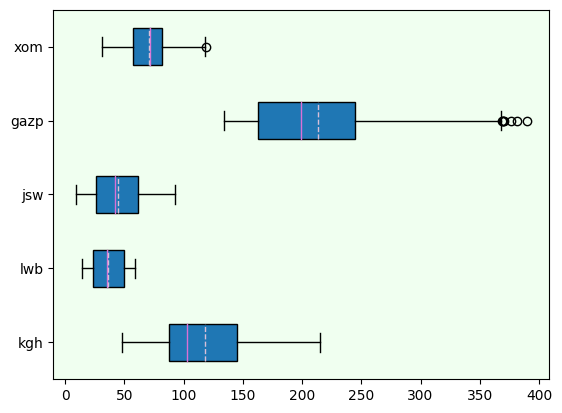

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot((spolki_interpolacja['kgh'], spolki_interpolacja['lwb'], spolki_interpolacja['jsw'], spolki_interpolacja['gazp'], spolki_interpolacja['xom']),
           vert=False, showmeans=True, showfliers=True, meanline=True,
           labels=('kgh', 'lwb', 'jsw', 'gazp', 'xom'), patch_artist=True,
           medianprops={'linewidth': 1, 'color': 'orchid'},
           meanprops={'linewidth': 1, 'color': 'thistle'})
ax.set_facecolor("honeydew")
plt.show()

#gazprom i exxon posiadają outliery (kółka)

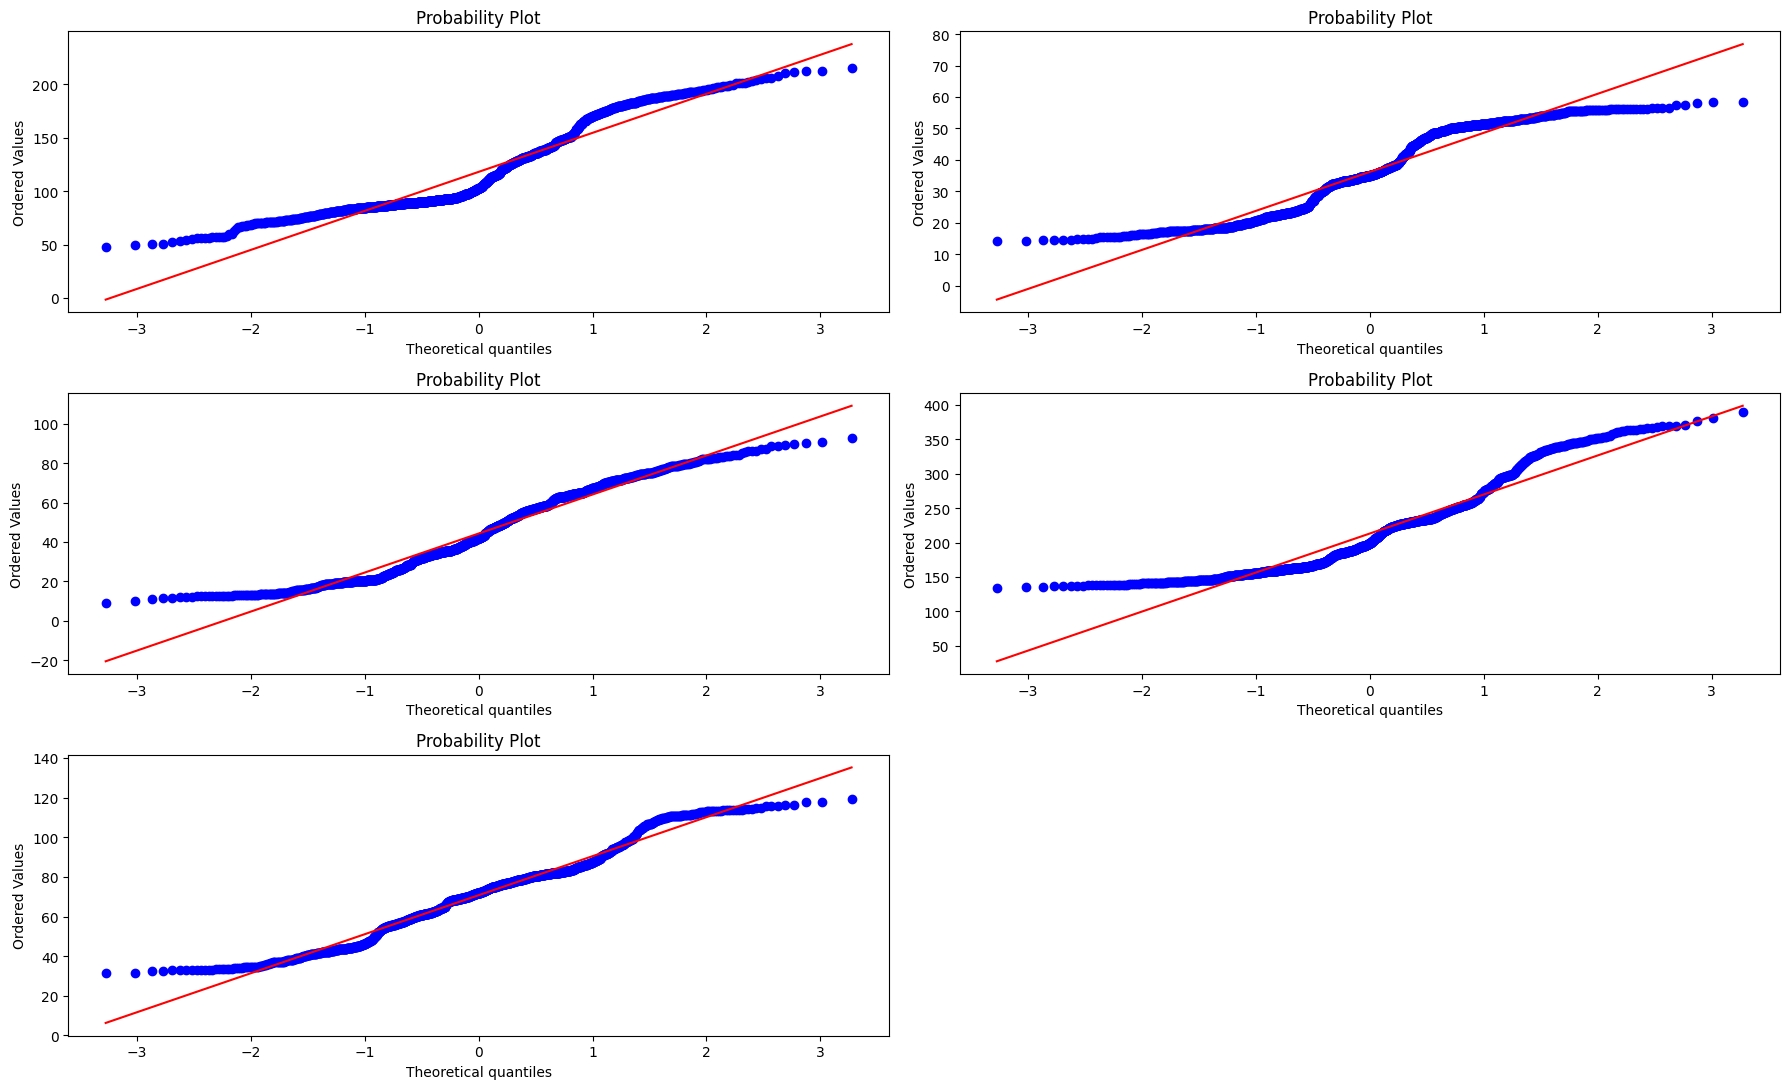

In [ ]:
#acf=sns.FacetGrid(spolki_interpolacja)
#pplot(spolki_interpolacja['kgh'], kind='qq')

fig=plt.figure(1, (18,11))

ax=plt.subplot (3, 2, 1)
stats.probplot(spolki_interpolacja['kgh'], plot=plt) #zgadza się to z histogramem

ax=plt.subplot (3, 2, 2)
stats.probplot(spolki_interpolacja['lwb'], plot=plt)

ax=plt.subplot (3, 2, 3)
stats.probplot(spolki_interpolacja['jsw'], plot=plt) 

ax=plt.subplot (3, 2, 4)
stats.probplot(spolki_interpolacja['gazp'], plot=plt) 

ax=plt.subplot (3, 2, 5)
stats.probplot(spolki_interpolacja['xom'], plot=plt) 
plt.tight_layout()
plt.show()

#qqplot(spolki_interpolacja['kgh'], line='s')

Na kolejne przemyślenia pozwalają wykresy pudełkowe i wykresy QQ. Pierwsze z wymienionych pozwalają uzupełnić wnioski dotyczące rozproszenia - szerokość pudełka wyznaczają wartości kwartyli Q3 i Q1. Niesymetryczne położenie mediany (fioletowy pasek), wyraźnie różna długość tzw. wąsów świadczą o wysokim zróżnicowaniu i prawostronnej asymetrii (wszystkie poza **Bogdanką**, zwłaszcza *Gazprom*; prawy wąs dłuższy od lewego, wątpliwość tylko dla Exxon). Zagraniczne spółki dodatkowo posiadają wartości odstające (oznaczone symbolem kółka). Bogdanka posiada wyraźnie mniejszą dyspersję (stosunek wielkości pudełka i długości wąsów).

Wykresy kwantylowe potwierdzają rozbieżność z rozkładem normalnym, zwłaszcza na krańcach rozkładów.

In [ ]:

def testy(spolka):
  print(f'Wartości testów przeprowadzono dla spółki giełdowej z symbolem {spolka} \n')
  jb=jarque_bera(spolki_interpolacja[f'{spolka}'])
  print('Jarque-Bera Statistic: %f' % jb[0])
  print('p-value: %f' % jb[1])
  print('----------------------------')
  shapiro1=shapiro(spolki_interpolacja[f'{spolka}'])
  print('Shapiro Statistic: %f' % shapiro1[0])
  print('p-value: %f' % shapiro1[1])
  print('----------------------------')
  kt=kurtosistest(spolki_interpolacja[f'{spolka}'], alternative = 'two-sided')
  print('KurtosisTest, Statistic: %f' % kt[0])
  print('p-value: %f' % kt[1])
  print('----------------------------')
  tt=ttest_1samp(spolki_interpolacja[f'{spolka}'], 0, alternative = 'two-sided')
  print('ttest, Statistic: %f' % tt[0])
  print('p-value: %f' % tt[1])
  print('----------------------------')
  adf=adfuller(spolki_interpolacja[f'{spolka}'])
  print('ADF Statistic: %f' % adf[0])
  print('p-value: %f' % adf[1])
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

In [ ]:
#testy
for i in enumerate(spolki_interpolacja.columns):
  testy(spolki_interpolacja.columns[i[0]])


Konkluzje z rezultatów testów powyżej nie są jednakowe dla każdej spółki, dlatego też objaśniamy poniżej wnioski z potencjalnego odrzucenia h0 w danym teście: 

*   Test Jarque-Bera: odrzucenie hipotezy o rozkładzie normalnym dla odchyleń losowych; w większości bardzo wysoka wartość statystyki testowej,
*   Rozszerzony test Dickeya-Fullera: szeregi cen są stacjonarne (często różnicowanie jest niezbędne dla uzyskania stacjonarności);  Brak obecności pierwiastka jednostkowego potwierdza, że szeregi opóźnione nie przyniosą dodatkowych informacji przydatnych w przewidywaniu zmiany cen zamknięcia.
*   Kurtoza, test Shapiro-Wilka: rozkład definiujący próbę nie ma charakteru rozkładu normalnego,
*   test T-studenta dla 1 próby: wartość oczekiwana (średnia teoretyczna) z próby nie jest równa jej średniej, nie mamy do czynienia z rozkładem t-Studenta (powiązane z badaniem rozkładu normalnego).

Wnioski na podstawie wartości statystyk testowych:

1.   KGHM, JSW, Bogdanka, ExxonMobil - szereg niestacjonarny o rozkładzie innym niż normalny i t-Studenta,
2.   Gazprom - szereg niestacjonarny, brak podstaw do odrzucenia hipotezy zerowej mówiącej o kurtozie próby scharakteryzowanej rozkładem normalnym (wartość kurtozy wyniosła najmniej, bo -0,11).

Fakt nieodrzucenia hipotezy zerowej mówiącej o obecności pierwiastka jednostkowego (niestacjonarność)
nie jest zaskoczeniem, skoro mamy bowiem do czynienia z ciągłą zmianą wartości zamiast ciągłego powracania do średniej (fakt empiryczny).


### Wykresy autokorelacji, histogram i funkcja gęstości

Poniżej dalsza część analizy potwierdzająca wcześniejsze wnioski - 
Rozkłady wielomodalne, najbliżej rozkładu lewoskośnego rozkład szeregu cen zamknięcia ExxonMobil. Podręcznikowa niestacjonarność, sugestia pierwszego,drugiego rzędu opóźnień w modelu autoregresji (PACF), istotna statystycznie pozytywna autokorelacja nawet dla 50. rzędu opóźnień, wyraźna zależność od wartości przeszłych (jednakowa korelacja wszystkich opóźnień z danymi).

**Jedyna istotna korelacja występuje dla opóźnienia jednostkowego!**

(wykresy ACF, PACF - obszarem zacienionym przedział ufności)

### KGH


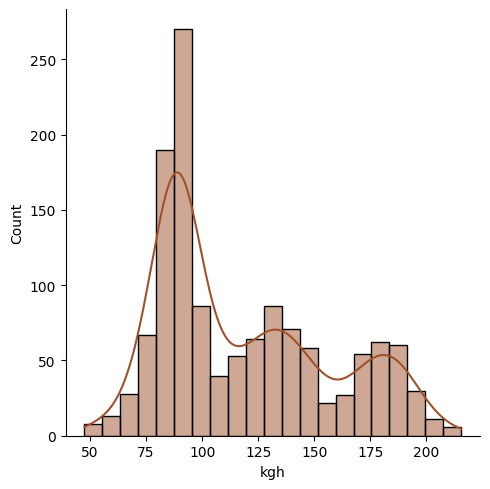

In [ ]:
sns.displot(spolki_interpolacja['kgh'], kde=True, bins=21, color="sienna")

#lub histplot

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


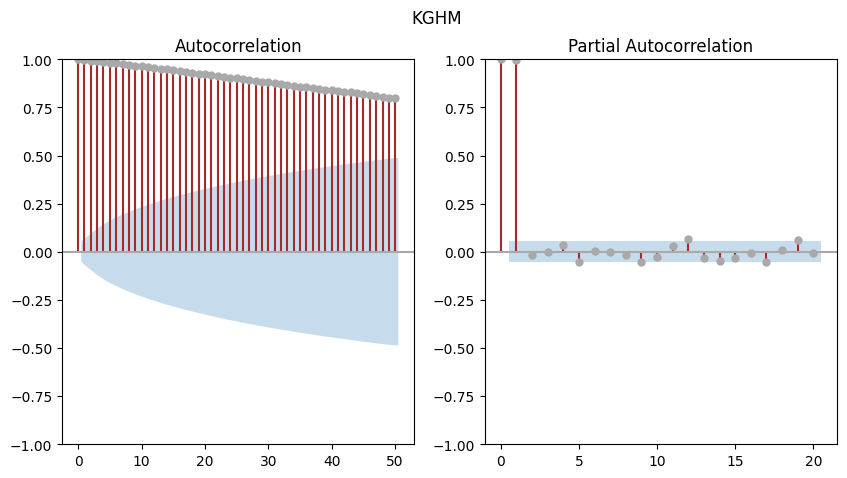

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(10,5))

plot_acf(spolki_interpolacja['kgh'], lags=50, color="darkgrey", vlines_kwargs={"colors": "brown"}, ax=ax[0])
plot_pacf(spolki_interpolacja['kgh'], lags=20, color="darkgrey", vlines_kwargs={"colors": "brown"}, ax=ax[1])
fig.suptitle('KGHM')
plt.show()

### Bogdanka


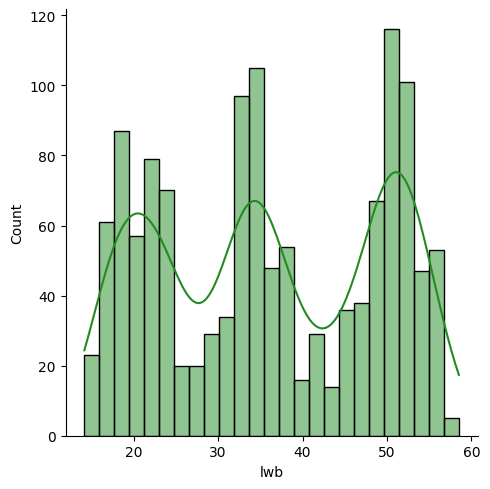

In [ ]:
sns.displot(spolki_interpolacja['lwb'], kde=True, bins=25, color="forestgreen")

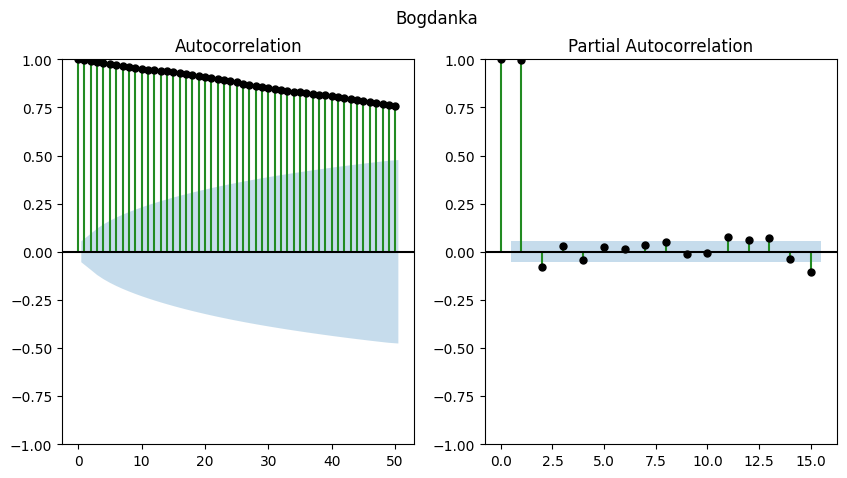

In [ ]:

fig, ax=plt.subplots(1,2, figsize=(10,5))

plot_acf(spolki_interpolacja['lwb'], lags=50, color="black", vlines_kwargs={"colors": "forestgreen"}, ax=ax[0])
plot_pacf(spolki_interpolacja['lwb'], lags=15, color="black", vlines_kwargs={"colors": "forestgreen"}, ax=ax[1])
fig.suptitle('Bogdanka')
plt.show()

### JSW


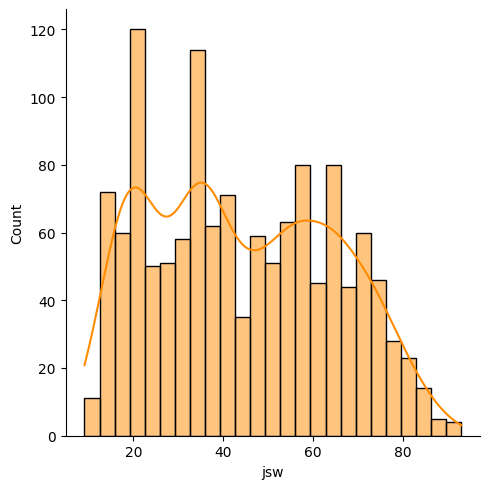

In [ ]:
sns.displot(spolki_interpolacja['jsw'], kde=True, bins=25, color="darkorange")

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


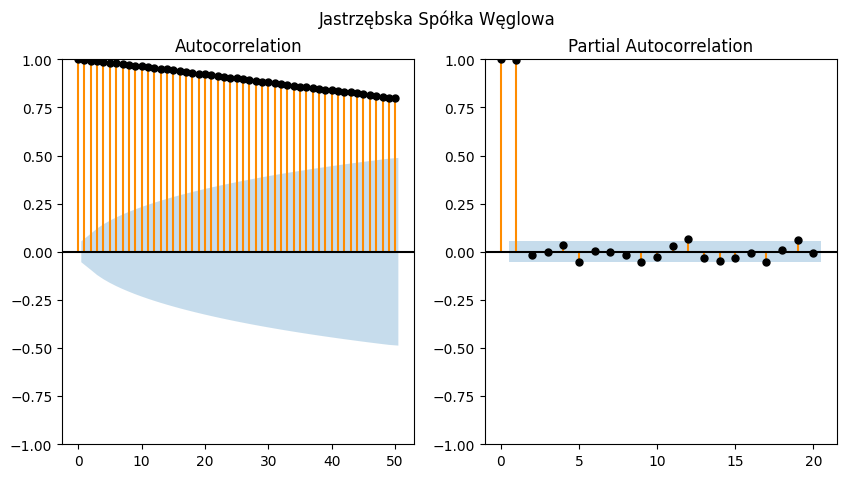

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(10,5))

plot_acf(spolki_interpolacja['kgh'], lags=50, color="black", vlines_kwargs={"colors": "darkorange"}, ax=ax[0])
plot_pacf(spolki_interpolacja['kgh'], lags=20, color="black", vlines_kwargs={"colors": "darkorange"}, ax=ax[1])
fig.suptitle('Jastrzębska Spółka Węglowa')
plt.show()

### Gazprom

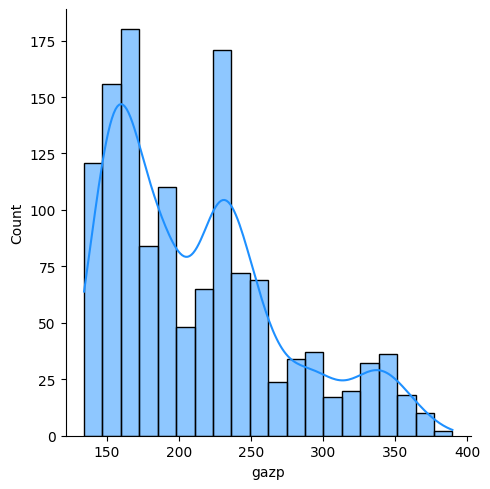

In [ ]:
sns.displot(spolki_interpolacja['gazp'], kde=True, bins=20, color="dodgerblue")

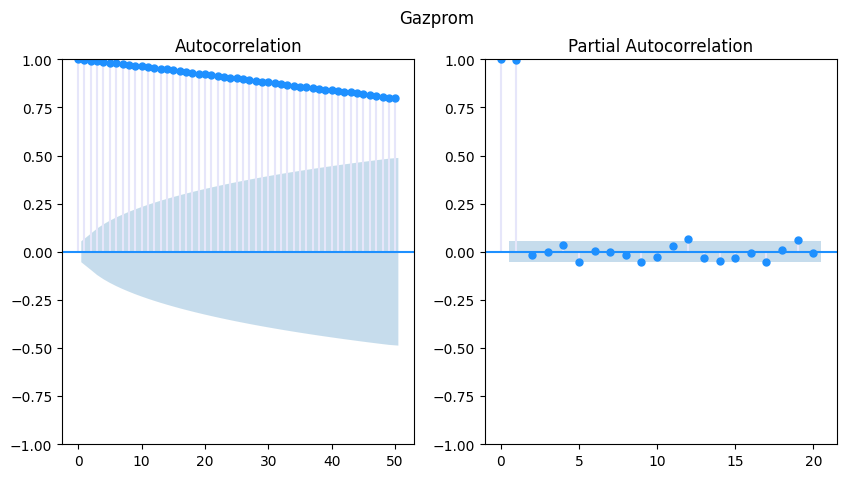

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(10,5))

plot_acf(spolki_interpolacja['kgh'], lags=50, color="dodgerblue", vlines_kwargs={"colors": "lavender"}, ax=ax[0])
plot_pacf(spolki_interpolacja['kgh'], lags=20, color="dodgerblue", vlines_kwargs={"colors": "lavender"}, ax=ax[1])
fig.suptitle('Gazprom')
plt.show()

### exxon

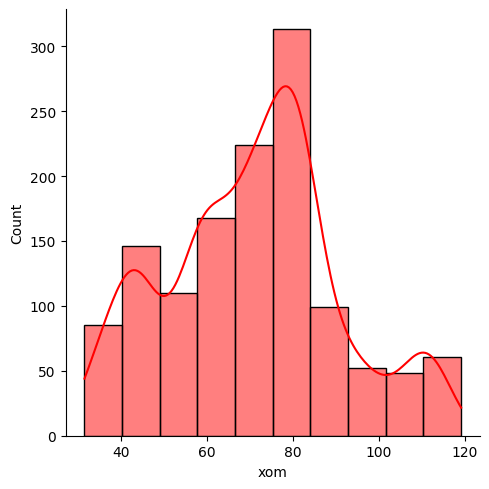

In [ ]:
sns.displot(spolki_interpolacja['xom'], kde=True, bins=10, color="red")

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


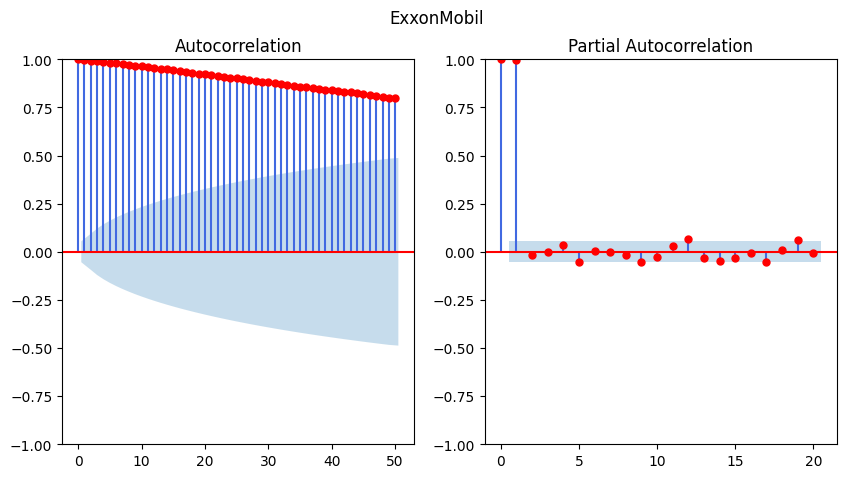

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(10,5))

plot_acf(spolki_interpolacja['kgh'], lags=50, color="red", vlines_kwargs={"colors": "royalblue"}, ax=ax[0])
plot_pacf(spolki_interpolacja['kgh'], lags=20, color="red", vlines_kwargs={"colors": "royalblue"}, ax=ax[1])
fig.suptitle('ExxonMobil')
plt.show()

### Całościowy raport

Na zakończenie, jako podsumowanie wyciągniętych wniosków, wykorzystanie interesującego modułu oferującego *EDA (Exploratory Data Analysis)*. Wyciągamy z niego między innymi dodatkowe wnioski o korelacji między kilkoma szeregami.

In [ ]:
raport = ProfileReport(spolki_interpolacja)
display(raport)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]